In [1]:
from metrics import BinaryMetrics
import torch
import cv2
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import os
import seaborn as sns
import numpy as np

from utils import generate_mask

In [2]:
df = pd.read_json(max(glob("./dataframe_dumps/df_eda_*"), key=os.path.getmtime))
df = df[df["sensor"] == "rgb_highres_center"]

C:\Users\atkovacs\AppData\Local\Temp\ipykernel_22444\5639941.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df = pd.read_json(max(glob("./dataframe_dumps/df_eda_*"), key=os.path.getmtime))


In [3]:
target = df.sample(1)

pred = []
for i in range(5):
    pred.append(df.sample(1))

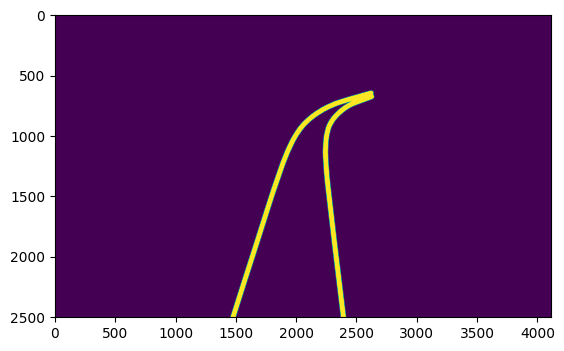

In [4]:
target_mask = (
    cv2.cvtColor(generate_mask(df, target.path.values[0]), cv2.COLOR_BGR2GRAY) / 255
)
pred_mask = []

for i in range(len(pred)):
    pred_mask.append(
        cv2.cvtColor(generate_mask(df, pred[i].path.values[0]), cv2.COLOR_BGR2GRAY)
        / 255
    )

pred_mask.append(np.zeros_like(target_mask).astype(np.float32))

plt.imshow(target_mask)

(2504, 4112)
(2504, 4112)
(2504, 4112)
(2504, 4112)
(2504, 4112)
(2504, 4112)


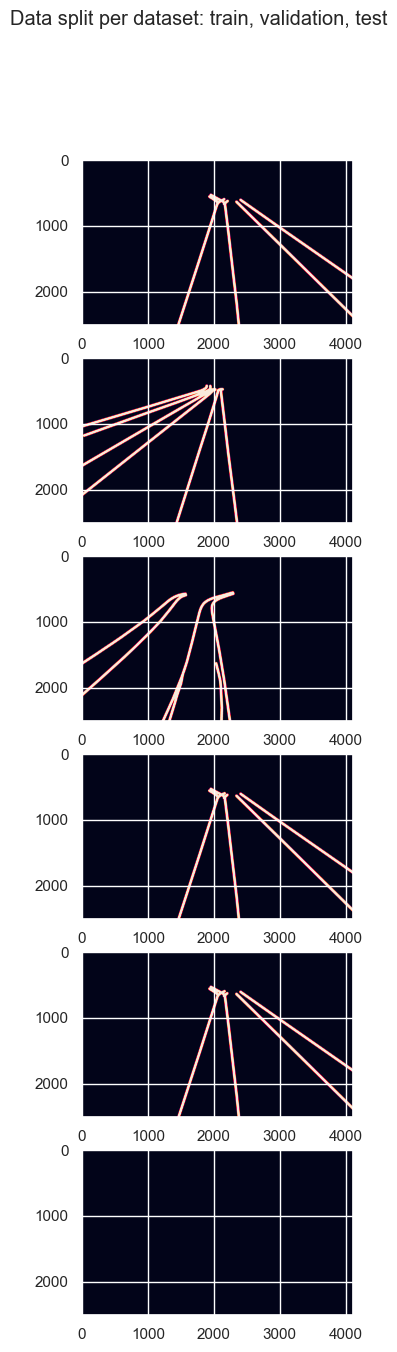

In [5]:
sns.set(rc={"figure.figsize": (15, 15)})

fig, ax = plt.subplots(len(pred_mask))
fig.suptitle("Data split per dataset: train, validation, test")

for i in range(len(pred_mask)):
    print(pred_mask[i].shape)
    ax[i].imshow(pred_mask[i])

In [6]:
transform = transforms.Compose([transforms.ToTensor()])

In [7]:
target_tensor = transform(target_mask)
target_tensor = target_tensor[None, :]
target_tensor.shape

torch.Size([1, 1, 2504, 4112])

In [8]:
pred_tensor = []
for i in range(len(pred_mask)):
    tmp = transform(pred_mask[i])
    pred_tensor.append(tmp[None, :])
    print(pred_tensor[-1].shape)

torch.Size([1, 1, 2504, 4112])
torch.Size([1, 1, 2504, 4112])
torch.Size([1, 1, 2504, 4112])
torch.Size([1, 1, 2504, 4112])
torch.Size([1, 1, 2504, 4112])
torch.Size([1, 1, 2504, 4112])


In [9]:
bm = BinaryMetrics()

In [17]:
for i in range(len(pred_tensor)):
    pixel_acc, dice, precision, specificity, recall, f1_score, iou = bm(
        y_pred=pred_tensor[i], y_true=target_tensor
    )
    print(
        f"""
        pixel_acc: {pixel_acc:.4f}
        dice: {dice:.4f}
        precision: {precision:.4f}
        specificity: {specificity:.4f}
        recall: {recall:.4f}
        f1_score: {f1_score:.4f}
        iou: {iou:.4f}
        ------------------------------------
        """
    )


        pixel_acc: 0.9678
        dice: 0.4185
        precision: 0.3113
        specificity: 0.9739
        recall: 0.6382
        f1_score: 0.4185
        iou: 0.2646
        ------------------------------------
        

        pixel_acc: 0.9301
        dice: 0.0422
        precision: 0.0281
        specificity: 0.9457
        recall: 0.0848
        f1_score: 0.0423
        iou: 0.0215
        ------------------------------------
        

        pixel_acc: 0.9406
        dice: 0.0087
        precision: 0.0062
        specificity: 0.9577
        recall: 0.0143
        f1_score: 0.0091
        iou: 0.0043
        ------------------------------------
        

        pixel_acc: 0.9694
        dice: 0.4471
        precision: 0.3326
        specificity: 0.9747
        recall: 0.6820
        f1_score: 0.4471
        iou: 0.2879
        ------------------------------------
        

        pixel_acc: 0.9694
        dice: 0.4479
        precision: 0.3332
        specificity: 0.9747
  